### **Importing the libraries:**

In [ ]:
!pip install colorama
! pip install colorama
! pip install pygame
! pip install gym
! pip install cmake 'gym[atari]' scipy
import gym
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import PIL.Image as Image
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 23.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.7 MB/s eta 0:00:00


In [ ]:
env = gym.make("Taxi-v3").env
env.reset()
print(env.render(mode='ansi'))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


## **Part a.**

### **Random Process without Q-learning:**

In [ ]:
Frames = []
total_reward = 0
done = 0
while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)  # Take a random action
  total_reward += reward
  Frames.append({'frame': env.render(mode='ansi'),'state': state,
    'action': action,'reward': total_reward})

In [ ]:
## Showing the process of the random model:
for i, frame in enumerate(Frames):
  clear_output(wait = True)
  print(frame['frame'])
  print(f"Timestep: {i + 1}")
  print(f"State: {frame['state']}")
  print(f"Action: {frame['action']}")
  print(f"Total Reward: {frame['reward']}")
  sleep(0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 1168
State: 475
Action: 5
Total Reward: -4882


### **Calculating the parameters:**

In [ ]:
Frames = []
penalties = []
avg_rewards = []
epoch_list = []
num_episodes = 500

for episode in range(num_episodes):
  state = env.reset()
  epochs = 0
  total_reward = 0
  penalty = 0
  done = 0
  while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)  # Take a random action
    total_reward = total_reward + reward
    if reward == -10:
      penalty += 1
    epochs += 1

  avg_rewards.append(total_reward/epochs)
  penalties.append(penalty/epochs)
  epoch_list.append(epochs)

### **Plotting the graphs of the parameters:**

Text(0.5, 1.0, 'Average Rewards per move')

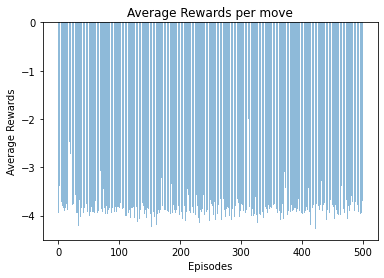

In [ ]:
Episodes = range(num_episodes)
plt.bar(Episodes, avg_rewards, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average Rewards')
plt.title('Average Rewards per move')

Text(0.5, 1.0, 'Average number of timesteps per trip')

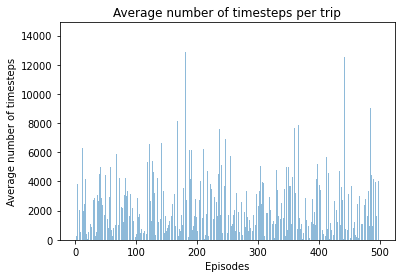

In [ ]:
plt.bar(Episodes, epoch_list, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average number of timesteps')
plt.title('Average number of timesteps per trip')

Text(0.5, 1.0, 'Average number of penalties per episode')

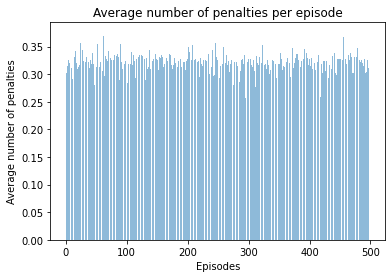

In [ ]:
plt.bar(Episodes, penalties, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average number of penalties')
plt.title('Average number of penalties per episode')

In [ ]:
print('Average Rewards per move', sum(avg_rewards) / num_episodes)
print('Average number of timsteps per trip', sum(epoch_list) / num_episodes)
print('Average number of penalties per episode: ', sum(penalties) / num_episodes)

Average Rewards per move -3.8558390328517653
Average number of timsteps per trip 2325.818
Average number of penalties per episode:  0.3207327350643278


## **Part b.**

### **Smart Process with Q-learning:**

In [ ]:
# Defining parameters:
alpha = 0.7
gamma = 0.9
epsilon = 1.0 
decay_rate = 0.01   # decay rate for epsilon

In [ ]:
state_num = env.observation_space.n
action_num = env.action_space.n
q_table = np.zeros([state_num, action_num])
num_episodes = 500
penalties = []
avg_rewards = []
epoch_list = []

for episode in range(num_episodes):
  state = env.reset()
  epochs = 0
  total_reward = 0
  penalty = 0
  done = 0

  while not done:
    if random.uniform(0,1) < epsilon:
      # exploration
      action = env.action_space.sample()
    else:
      # exploitation
      action = np.argmax(q_table[state,:])

    next_state, reward, done, info = env.step(action)
    # Q-learning 
    q_table[state,action] = q_table[state,action] + alpha*(reward + gamma*np.max(q_table[next_state,:])-q_table[state,action])
    state = next_state

    # counting the number of penalties:
    if reward == -10:
      penalty += 1
    total_reward = total_reward + reward
    epochs += 1

  # update epsilon:
  epsilon -= decay_rate

  avg_rewards.append(total_reward/epochs)
  penalties.append(penalty/epochs)
  epoch_list.append(epochs)

In [ ]:
done = 0
Total_reward = 0
state = env.reset()
i = 0
while not done:
  action = np.argmax(q_table[state,:])
  next_state, reward, done, info = env.step(action)
  Total_reward += reward
  clear_output(wait = True)
  print(env.render(mode='ansi'))
  print(f"Timestep: {i + 1}")
  print(f"State: {state}")
  print(f"Action: {action}")
  print(f"Total Reward: {Total_reward}")
  i += 1
  state = next_state
  sleep(1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 12
State: 16
Action: 5
Total Reward: 9


### **Plotting the graphs of the parameters:**

Text(0.5, 1.0, 'Average Rewards per move')

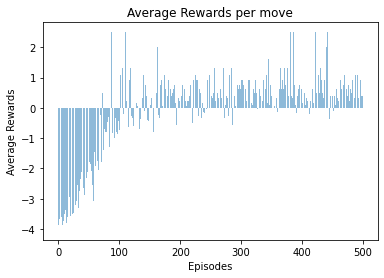

In [ ]:
Episodes = range(num_episodes)
plt.bar(Episodes, avg_rewards, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average Rewards')
plt.title('Average Rewards per move')

Text(0.5, 1.0, 'Average number of timesteps per trip')

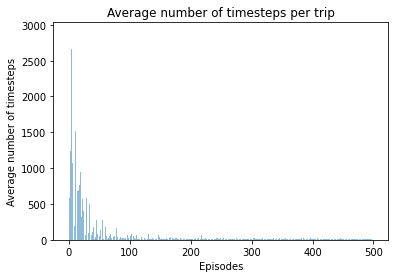

In [ ]:
plt.bar(Episodes, epoch_list, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average number of timesteps')
plt.title('Average number of timesteps per trip')

Text(0.5, 1.0, 'Average number of penalties per episode')

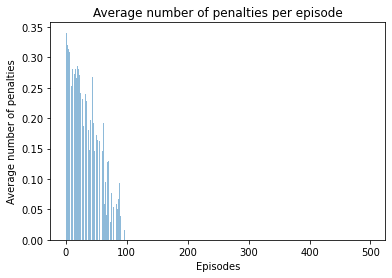

In [ ]:
plt.bar(Episodes, penalties, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average number of penalties')
plt.title('Average number of penalties per episode')

In [ ]:
print('Average Rewards per move', sum(avg_rewards) / num_episodes)
print('Average number of timsteps per trip', sum(epoch_list) / num_episodes)
print('Average number of penalties per episode: ', sum(penalties) / num_episodes)

Average Rewards per move 0.00750892136184102
Average number of timsteps per trip 72.75
Average number of penalties per episode:  0.03347153413596905


### **Improving the Rewards:**

In [ ]:
state_num = env.observation_space.n
action_num = env.action_space.n
q_table = np.zeros([state_num, action_num])
num_episodes = 500
penalties = []
avg_rewards = []
epoch_list = []

for episode in range(num_episodes):
  state = env.reset()
  epochs = 0
  total_reward = 0
  penalty = 0
  done = 0

  while not done:
    if random.uniform(0,1) < epsilon:
      # exploration
      action = env.action_space.sample()
    else:
      # exploitation
      action = np.argmax(q_table[state,:])

    next_state, reward, done, info = env.step(action)

    ## Improving the rewards:
    if reward == 20:
      reward = 100

    # Q-learning 
    q_table[state,action] = q_table[state,action] + alpha*(reward + gamma*np.max(q_table[next_state,:])-q_table[state,action])
    state = next_state

    # counting the number of penalties:
    if reward == -10:
      penalty += 1
    total_reward = total_reward + reward
    epochs += 1

  # update epsilon:
  epsilon -= decay_rate

  avg_rewards.append(total_reward/epochs)
  penalties.append(penalty/epochs)
  epoch_list.append(epochs)

### **Plotting the graphs of the parameters:**

Text(0.5, 1.0, 'Average Rewards per move')

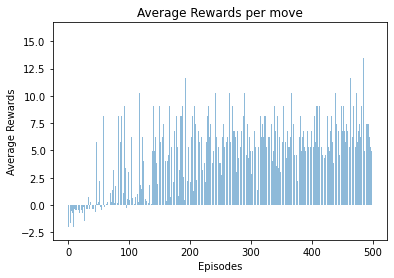

In [ ]:
Episodes = range(num_episodes)
plt.bar(Episodes, avg_rewards, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average Rewards')
plt.title('Average Rewards per move')

Text(0.5, 1.0, 'Average number of timesteps per trip')

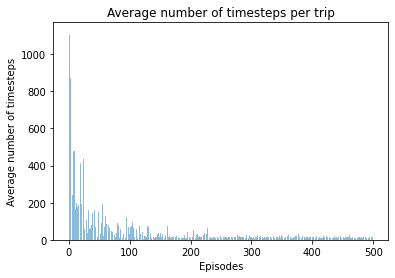

In [ ]:
plt.bar(Episodes, epoch_list, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average number of timesteps')
plt.title('Average number of timesteps per trip')

Text(0.5, 1.0, 'Average number of penalties per episode')

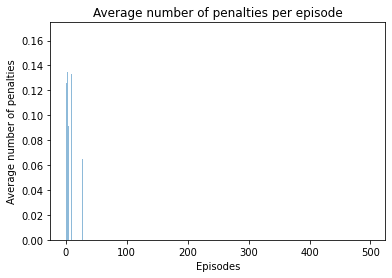

In [ ]:
plt.bar(Episodes, penalties, align = 'center', alpha = 0.5)
plt.xlabel('Episodes') 
plt.ylabel('Average number of penalties')
plt.title('Average number of penalties per episode')

In [ ]:
print('Average Rewards per move', sum(avg_rewards) / num_episodes)
print('Average number of timsteps per trip', sum(epoch_list) / num_episodes)
print('Average number of penalties per episode: ', sum(penalties) / num_episodes)

Average Rewards per move 5.028767470508919
Average number of timsteps per trip 49.16
Average number of penalties per episode:  0.0030621376413140365
